# Exploratory Analysis of Housing Dataset for Machine Learning.

>***The objective of this analysis is to identify actions that must be completed in order to prepare the housing data set for machine learning.***

***Analysis by Stephen Sani***

## Required Packages

 We begin by collecting the rquired packages for the analysis

In [1]:
import os.path

import matplotlib as mpl
import matplotlib.image as image
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from pandas.plotting import scatter_matrix

import util_dirs
import util_files

## Getting the Data

Next we do the following:
1. Setup project directories
2. Download archive
2. Extract file from archive
3. Read file into a dataframe named housing

In [2]:
url = 'https://raw.githubusercontent.com/ageron/handson-ml2/master/datasets/housing/housing.tgz'
data_root = os.path.join('.', 'resources', 'download')
file_name = 'housing.csv'

# Setup project directories
util_dirs.create_project_dirs()

# Download archive file from url
tgz = util_files.download_file(url)

# Extract archive file
util_files.extract(tgz)

# Read data
housing = pd.read_csv(os.path.join(data_root, file_name))


Directory already exist: resources
Directory already exist: resources/data
Directory already exist: resources/styles
Directory already exist: resources/images
Directory already exist: resources/download
Download: File already exists!
Extraction: Successful!


## Preview the Housing Data

1. View first few rows of housing

In [3]:
housing.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


2. View random row samples of housing

In [4]:
housing.sample(10)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
935,-122.04,37.50,17.0,407.0,97.0,307.0,100.0,3.1696,156300.0,NEAR BAY
10927,-117.89,33.74,34.0,1759.0,353.0,2083.0,330.0,3.2292,160600.0,<1H OCEAN
10101,-117.97,33.92,32.0,2620.0,398.0,1296.0,429.0,5.7796,241300.0,<1H OCEAN
14587,-117.18,32.83,23.0,2105.0,525.0,1218.0,484.0,3.3750,184100.0,NEAR OCEAN
9956,-122.21,38.41,12.0,4270.0,654.0,1624.0,598.0,5.5266,331300.0,INLAND
19196,-122.70,38.44,45.0,883.0,202.0,401.0,194.0,3.2845,178300.0,<1H OCEAN
18131,-122.02,37.34,26.0,1992.0,328.0,980.0,342.0,6.2475,350000.0,<1H OCEAN
15451,-117.31,33.17,7.0,2349.0,312.0,809.0,282.0,5.5520,283900.0,NEAR OCEAN
11391,-117.97,33.74,18.0,2814.0,539.0,1439.0,493.0,3.5990,262000.0,<1H OCEAN
9989,-121.07,39.15,15.0,6828.0,1319.0,3002.0,1318.0,2.4726,143400.0,INLAND


3. View technical information of housing data

In [5]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


Observations:
1. Column names are simple and consistent
2. Only one variable have missing value: total_bedroom
3. Data type of all but one are float: ocean_proximity is str.

## Data cleaning

We drop examples with missing values
Note: Only total_bedrooms have missing values

In [6]:
# Drop missing values
housing = housing.dropna(axis=0, how='any')
# Re-index
housing.index = range(housing.shape[0])


## Data Visualization

We set up to gain more insght from the data through various visualization

In [7]:
%matplotlib inline
style = './resources/styles/stephen_born.mplstyle'
logo = './resources/images/Glintoollogo_mini.png'


We visualize the scatter matrix for all variables.

C:\Users\Sani\AppData\Local\Temp\ipykernel_756\2644595676.py:4: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared.
  scatter_matrix(housing, alpha=0.2, ax=ax)


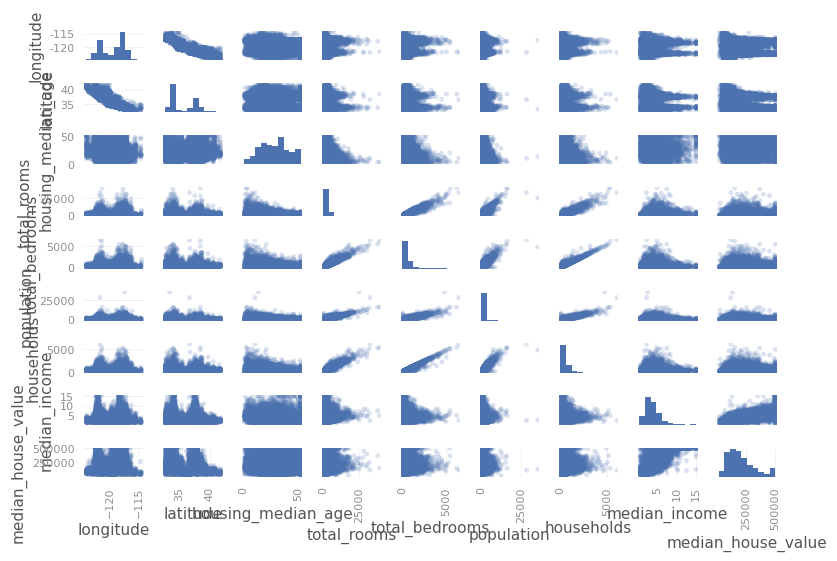

In [8]:
# Scatter matrix for all variables.
with mpl.style.context(style):
    fig, ax = plt.subplots()
    scatter_matrix(housing, alpha=0.2, ax=ax)

This visualization presents vital insights but is too busy. Let us focus on some spcific aspects

We visualize the distribution of numeric features

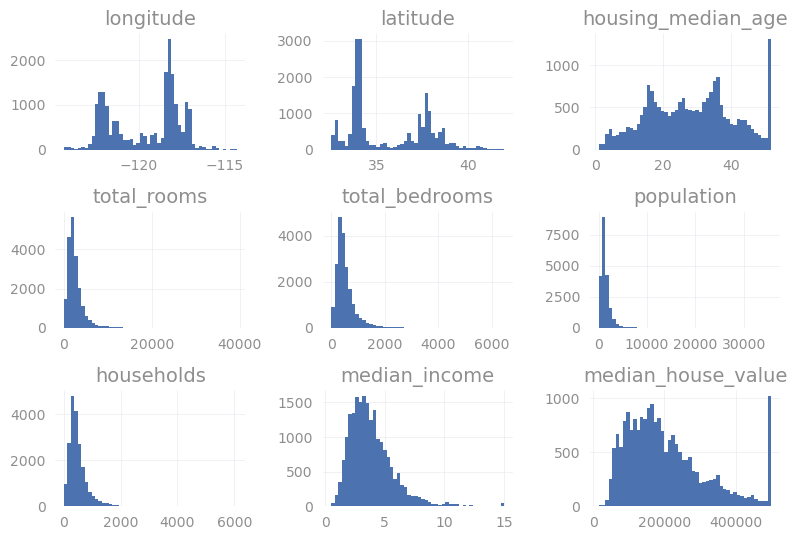

In [9]:
# Distribution of numeric features
with mpl.style.context(style):
    housing.hist(bins=50)

Observation:
1. housing_median_age is capped
2. median_income is capped and scaled
3. median_house_value is capped

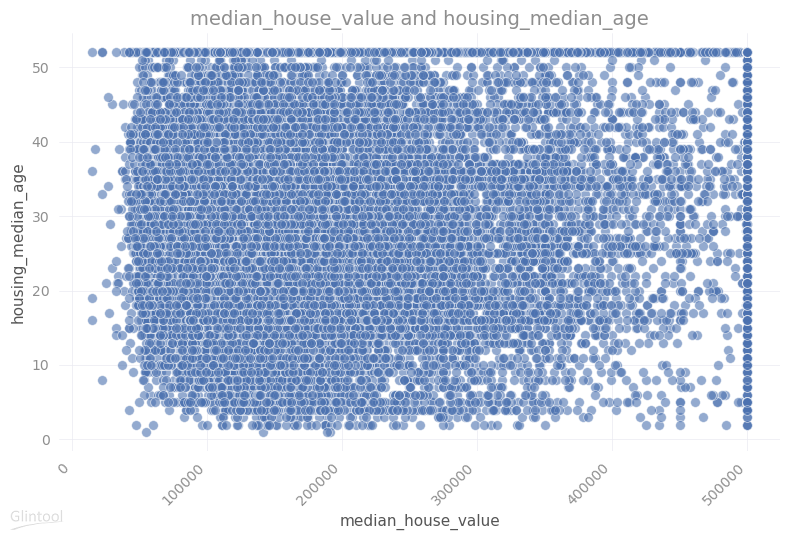

In [10]:
# median_house_value and housing_median_age
with mpl.style.context(style):
    fig, ax = plt.subplots()
    sns.scatterplot(
        data=housing,
        x='median_house_value',
        y='housing_median_age',
        alpha=0.6
    )
    ax.set(
        title="median_house_value and housing_median_age",
        xlabel='median_house_value',
        ylabel='housing_median_age',
    )
    # ax.yaxis.set_major_formatter(utils.num_cent)
    plt.setp(ax.get_xticklabels(), rotation=45, horizontalalignment='right')
    fig.figimage(image.imread(logo), 10, 10, zorder=3, alpha=0.15)


We need to do the following:
1. Remove example with capped housing_median_age
2. Remove example with capped median_income
3. Remove exampleswith capped median_house_value

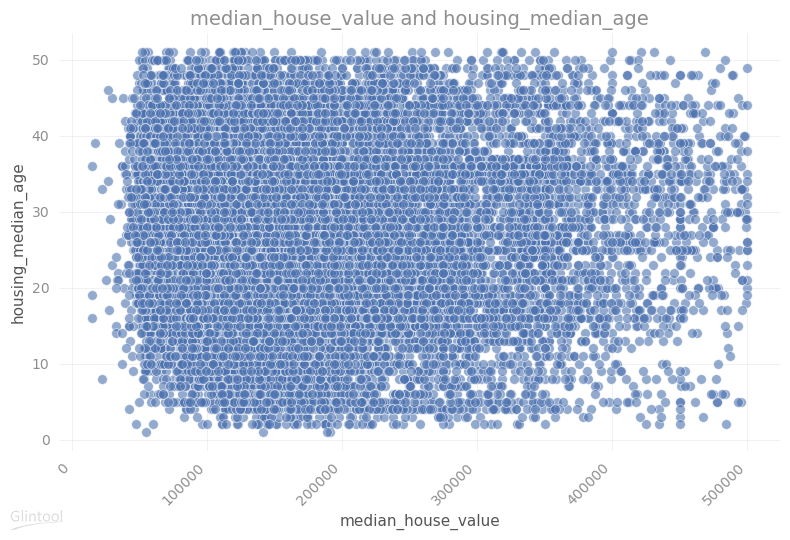

In [11]:
# Remove examples with capped median_house_values
housing.drop(
    housing[housing['median_house_value'] == 500001].index,
    inplace=True,
    axis=0
)

# Remove examples with capped median_income
housing.drop(
    housing[housing['median_income'] == 15].index,
    inplace=True,
    axis=0
)

# Remove examples with capped housing_median_age
housing.drop(
    housing[housing['housing_median_age'] == 52].index,
    inplace=True,
    axis=0
)
# median_house_value and housing_median_age
with mpl.style.context(style):
    fig, ax = plt.subplots()
    sns.scatterplot(
        data=housing,
        x='median_house_value',
        y='housing_median_age',
        alpha=0.6
    )
    ax.set(
        title="median_house_value and housing_median_age",
        xlabel='median_house_value',
        ylabel='housing_median_age',
    )
    # ax.yaxis.set_major_formatter(utils.num_cent)
    plt.setp(ax.get_xticklabels(), rotation=45, horizontalalignment='right')
    fig.figimage(image.imread(logo), 10, 10, zorder=3, alpha=0.15)

We are also interested in the geographical information of the data set

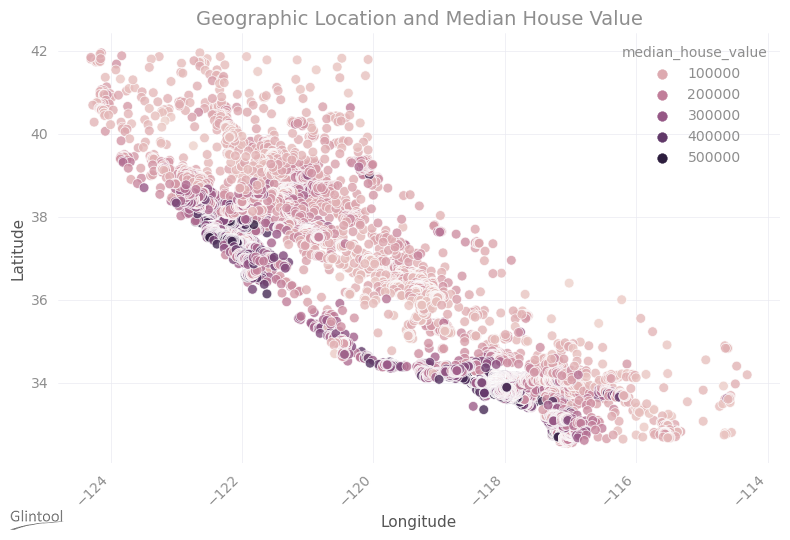

In [12]:
# Geographic Location and median_house_value
with mpl.style.context(style):
    fig, ax = plt.subplots()
    sns.scatterplot(
        data=housing,
        x='longitude',
        y='latitude',
        hue='median_house_value',
        alpha=0.8
    )
    ax.set(
        title="Geographic Location and Median House Value",
        xlabel='Longitude',
        ylabel='Latitude',
    )
    # ax.yaxis.set_major_formatter(utils.num_cent)
    plt.setp(ax.get_xticklabels(), rotation=45, horizontalalignment='right')
    fig.figimage(image.imread(logo), 10, 10, zorder=3, alpha=0.6)


Examples are categorized by their proximity to the ocean, let us put that information to contextualize

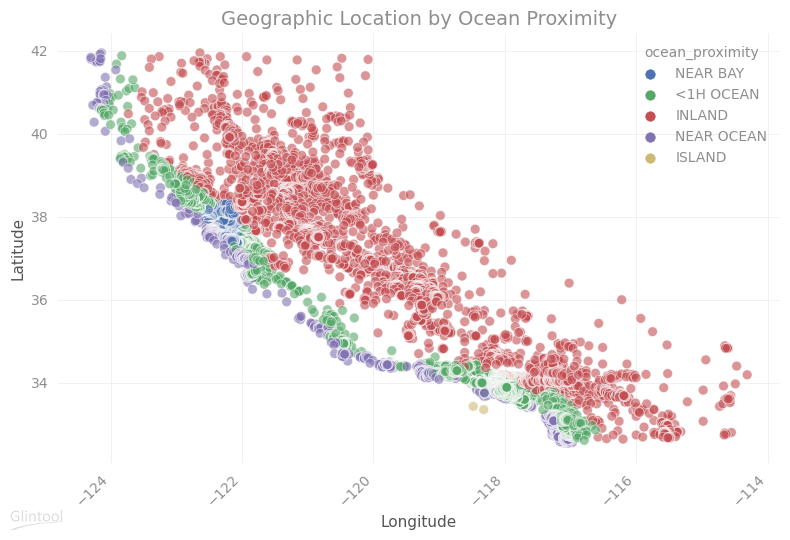

In [13]:
# Geographic location by ocean_proximity
with mpl.style.context(style):
    fig, ax = plt.subplots()
    sns.scatterplot(
        data=housing,
        x='longitude',
        y='latitude',
        hue='ocean_proximity',
        alpha=0.6
    )
    ax.set(
        title="Geographic Location by Ocean Proximity",
        xlabel='Longitude',
        ylabel='Latitude',
    )
    # ax.yaxis.set_major_formatter(utils.num_cent)
    plt.setp(ax.get_xticklabels(), rotation=45, horizontalalignment='right')
    fig.figimage(image.imread(logo), 10, 10, zorder=3, alpha=0.15)


Observation
1. The order of the ocean_proximity don't match.
2. ocean_proximity is obviously an ordered categorical variable. The correct order is ['INLAND', 'NEAR BAY', '<1H OCEAN', 'NEAR OCEAN', 'ISLAND']. In addition we must encode the ordered levels of this category for machine learning.

In [14]:
housing['ocean_proximity'] = housing['ocean_proximity'].astype('category').cat.reorder_categories(
    ['INLAND', 'NEAR BAY', '<1H OCEAN', 'NEAR OCEAN', 'ISLAND']
)

Let us recreate the same visualization with the correct order

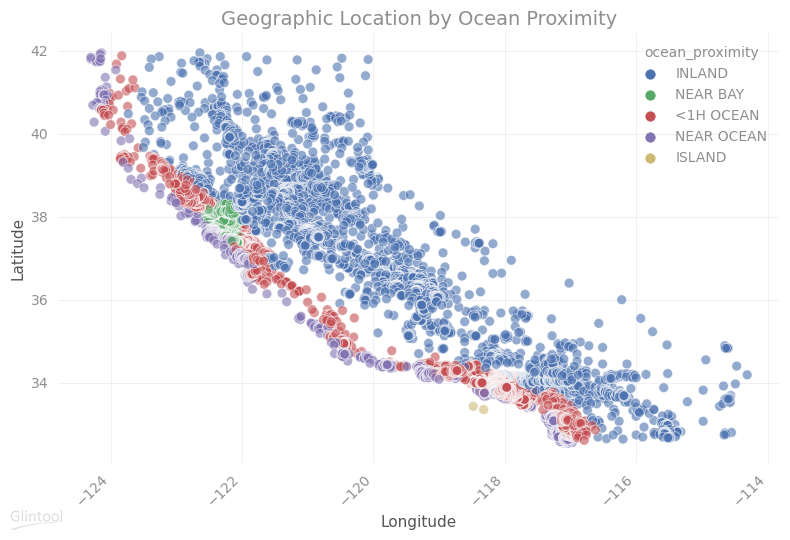

In [15]:
# Geographic location by ocean_proximity
with mpl.style.context(style):
    fig, ax = plt.subplots()
    sns.scatterplot(
        data=housing,
        x='longitude',
        y='latitude',
        hue='ocean_proximity',
        alpha=0.6
    )
    ax.set(
        title="Geographic Location by Ocean Proximity",
        xlabel='Longitude',
        ylabel='Latitude',
    )
    # ax.yaxis.set_major_formatter(utils.num_cent)
    plt.setp(ax.get_xticklabels(), rotation=45, horizontalalignment='right')
    fig.figimage(image.imread(logo), 10, 10, zorder=3, alpha=0.15)

Let us visualize Total Rooms and Total Bedrooms by Housing Median Age

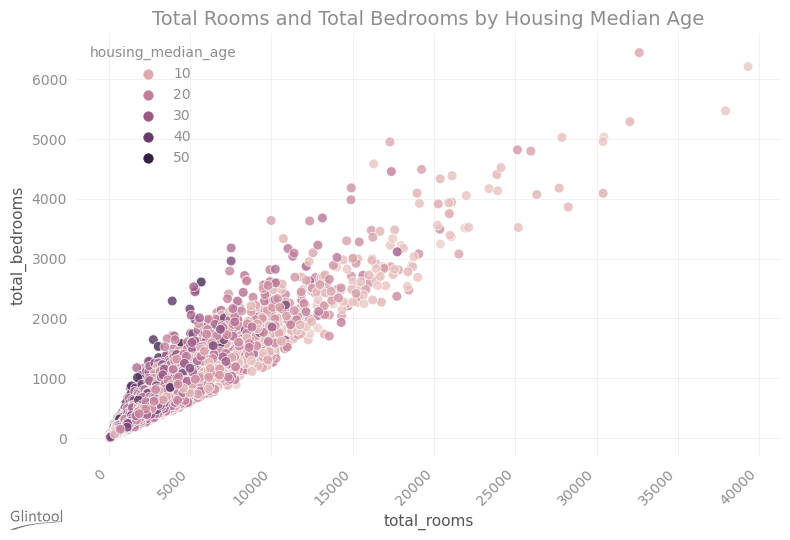

In [16]:
# Total Rooms and Total Bedrooms by Housing Median Age
with mpl.style.context(style):
    fig, ax = plt.subplots()
    sns.scatterplot(
        data=housing,
        x='total_rooms',
        y='total_bedrooms',
        hue='housing_median_age',
        alpha=0.8
    )
    ax.set(
        title="Total Rooms and Total Bedrooms by Housing Median Age",
        xlabel='total_rooms',
        ylabel='total_bedrooms',
    )
    # ax.yaxis.set_major_formatter(utils.num_cent)
    plt.setp(ax.get_xticklabels(), rotation=45, horizontalalignment='right')
    fig.figimage(image.imread(logo), 10, 10, zorder=3, alpha=0.6)


Let us visualize Total Rooms and Total Bedrooms by Median House Value

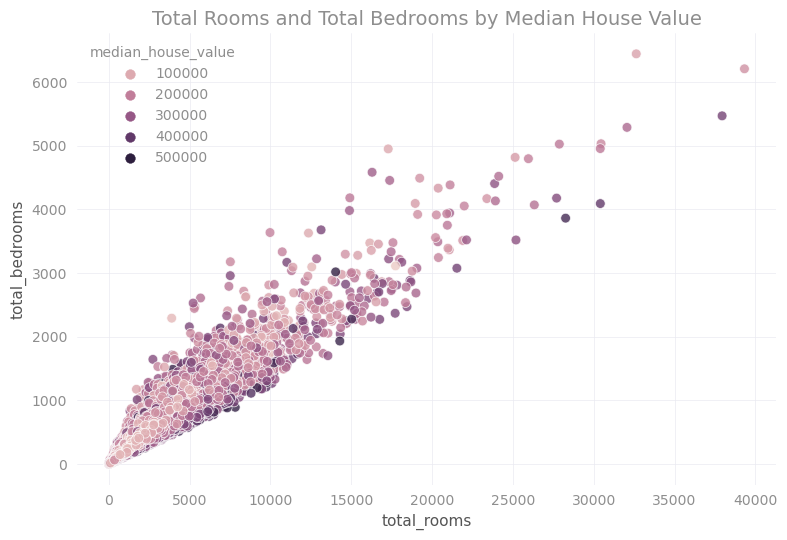

In [17]:
# Total Rooms and Total Bedrooms by Median House Value
with mpl.style.context(style):
    fig, ax = plt.subplots()
    sns.scatterplot(
        data=housing,
        x='total_rooms',
        y='total_bedrooms',
        hue='median_house_value',
        alpha=0.8
    )
    ax.set(
        title="Total Rooms and Total Bedrooms by Median House Value",
        xlabel='total_rooms',
        ylabel='total_bedrooms',
    )

Let us visualize Distribution of Median House Value

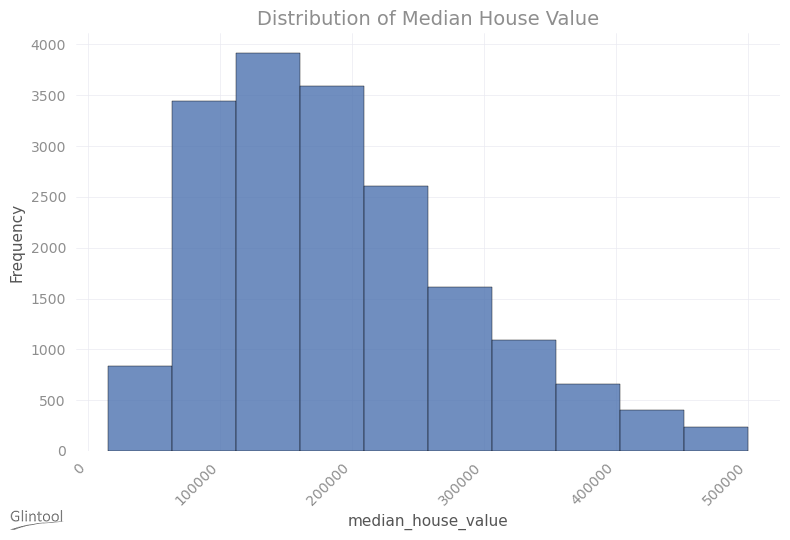

In [18]:
# Distribution of Median House Value
with mpl.style.context(style):
    fig, ax = plt.subplots()
    sns.histplot(
        data=housing,
        x='median_house_value',
        bins=10,
        alpha=0.8
    )
    ax.set(
        title="Distribution of Median House Value",
        ylabel='Frequency',
    )
    # ax.yaxis.set_major_formatter(utils.num_cent)
    plt.setp(ax.get_xticklabels(), rotation=45, horizontalalignment='right')
    fig.figimage(image.imread(logo), 10, 10, zorder=3, alpha=0.6)


Let us visualize median_income and median_house_value

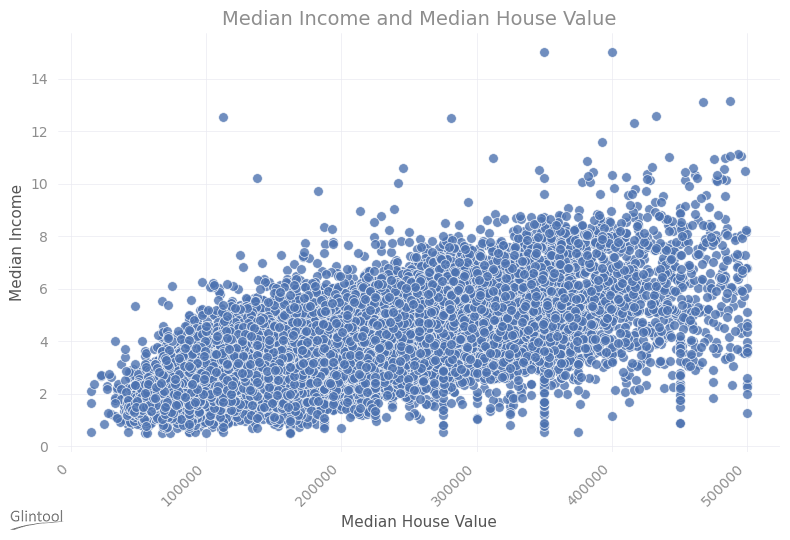

In [19]:
# median_income and median_house_value
with mpl.style.context(style):
    fig, ax = plt.subplots()
    sns.scatterplot(
        data=housing,
        x='median_house_value',
        y='median_income',
        alpha=0.8
    )
    ax.set(
        title="Median Income and Median House Value",
        xlabel='Median House Value',
        ylabel='Median Income',
    )
    # ax.yaxis.set_major_formatter(utils.num_cent)
    plt.setp(ax.get_xticklabels(), rotation=45, horizontalalignment='right')
    fig.figimage(image.imread(logo), 10, 10, zorder=3, alpha=0.6)


## Feature Engineering

Let us create new meaningful features from existing ones

In [20]:
# Feature Engineering: Create new features
housing['rooms_per_bedrooms'] = housing['total_rooms'] / housing['total_bedrooms']
housing['population_per_households'] = housing['population'] / housing['households']
housing['median_income_per_households'] = housing['median_income'] / housing['households']

Let us visualize the distribution of all numeric features

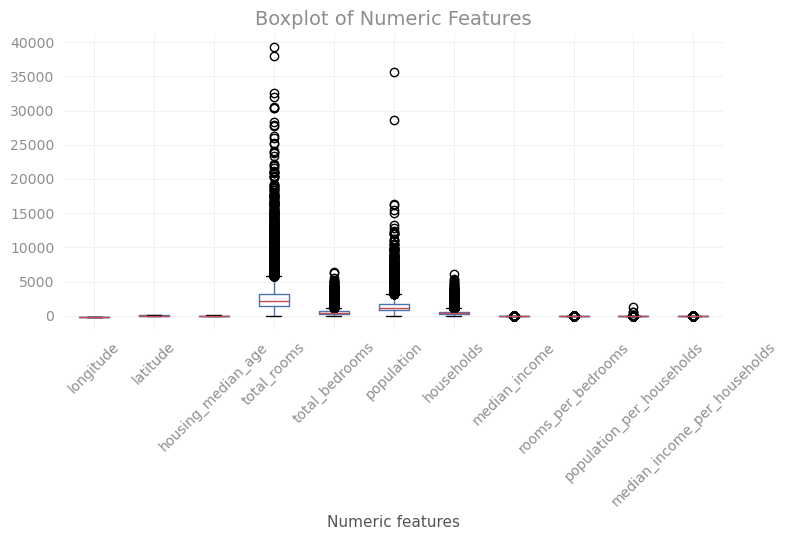

In [21]:
# Distribution of numeric features
with mpl.style.context(style):
    fig, ax = plt.subplots()
    housing.loc[:, ['longitude',
                    'latitude',
                    'ocean_proximity',
                    'housing_median_age',
                    'total_rooms',
                    'total_bedrooms',
                    'population',
                    'households',
                    'median_income',
                    'rooms_per_bedrooms',
                    'population_per_households',
                    'median_income_per_households'
                   ]].boxplot(rot=45, ax=ax)
    ax.set(
        title="Boxplot of Numeric Features",
        xlabel='Numeric features',
    )

Observation 
1. Outliers exist, we must apply robust feature scaling.

In [22]:
# Feature scaling
housing['longitude'] = (housing['longitude'] - housing['longitude'].mean()) / housing['longitude'].std()
housing['latitude'] = (housing['latitude'] - housing['latitude'].mean()) / housing['latitude'].std()
housing['housing_median_age'] = (housing['housing_median_age'] - housing['housing_median_age'].mean()) / housing[
    'housing_median_age'].std()
housing['total_rooms'] = (housing['total_rooms'] - housing['total_rooms'].mean()) / housing['total_rooms'].std()
housing['total_bedrooms'] = (housing['total_bedrooms'] - housing['total_bedrooms'].mean()) / housing[
    'total_bedrooms'].std()
housing['population'] = (housing['population'] - housing['population'].mean()) / housing['population'].std()
housing['households'] = (housing['households'] - housing['households'].mean()) / housing['households'].std()
housing['median_income'] = (housing['median_income'] - housing['median_income'].mean()) / housing['median_income'].std()
housing['rooms_per_bedrooms'] = (housing['rooms_per_bedrooms'] - housing['rooms_per_bedrooms'].mean()) / housing['rooms_per_bedrooms'].std()
housing['population_per_households'] = (housing['population_per_households'] - housing['population_per_households'].mean()) / housing['population_per_households'].std()
housing['median_income_per_households'] = (housing['median_income_per_households'] - housing['median_income_per_households'].mean()) / housing['median_income_per_households'].std()

We visualize the effect of feature scaling on numeric variables

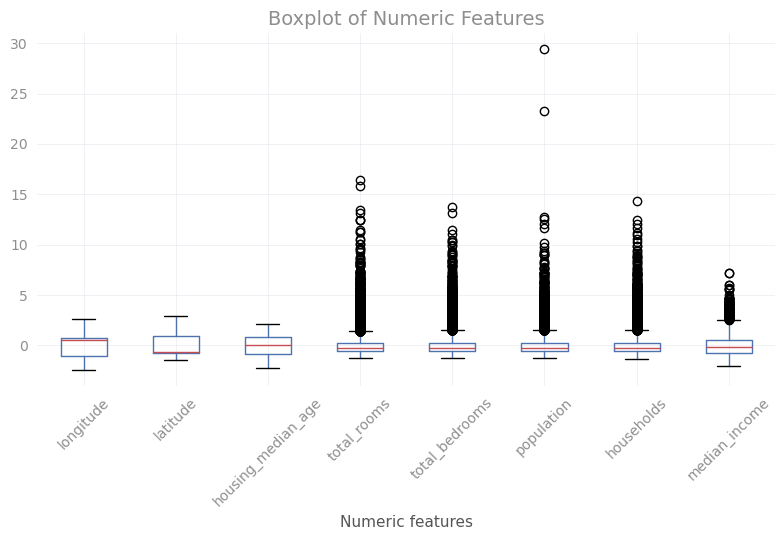

In [23]:
with mpl.style.context(style):
    fig, ax = plt.subplots()
    housing.loc[:, ['longitude',
                    'latitude',
                    'ocean_proximity',
                    'housing_median_age',
                    'total_rooms',
                    'total_bedrooms',
                    'population',
                    'households',
                    'median_income']].boxplot(rot=45, ax=ax)
    ax.set(
        title="Boxplot of Numeric Features",
        xlabel='Numeric features',
    )


Display correlation of all numeric variables with median_house_value

In [24]:
# Correlation with median_house_value
housing.corr()['median_house_value'].sort_values(ascending=False)

median_house_value              1.000000
median_income                   0.661027
rooms_per_bedrooms              0.336559
total_rooms                     0.151571
households                      0.099076
total_bedrooms                  0.079721
median_income_per_households    0.063804
population                      0.020692
housing_median_age              0.015306
population_per_households      -0.020283
longitude                      -0.021329
latitude                       -0.172760
Name: median_house_value, dtype: float64

## Summary: To-Do List for Machine Learning Preparation

1. Read housing
2. Drop examples with missing values in ['total_bedroom']
3. Drop examples capped on ['median_house_values', 'median_income', 'housing_median_age']
4. Encode ocean_proximity by order: ordinal encode
5. Create new features: ['rooms_per_bedrooms', 'population_per_households', 'median_income_per_households']
6. Feature scaling: Standard scaler